In [10]:
# Load the packages
library(fUnitRoots)
library(zoo)
library(tseries)
library(forecast)
library(readr)

In [11]:
path <- "/Users/nayelbenabdesadok/GitProjects/Time_Series_ENSAE"
setwd(path)
getwd() 
list.files() 

[1] "/Users/nayelbenabdesadok/GitProjects/Time_Series_ENSAE"

[1] "AR(1).R"                   "Assignment.pdf"           
 [3] "CVSCJO.csv"                "Code.R"                   
 [5] "Nayel.ipynb"               "Pistes_Statapp"           
 [7] "README.md"                 "alimentation_sans_covid.R"
 [9] "box-jenkins.R"             "build"                    
[11] "test.R"

In [14]:
path_donnees <- "/Users/nayelbenabdesadok/GitProjects/Time_Series_ENSAE/CVSCJO.csv"
df <- read_csv2(path_donnees, show_col_types = FALSE)
df

i Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



Libellé,"Indice CVS-CJO de la production industrielle (base 100 en 2021) - Fabrication de glaces et sorbets (NAF rév. 2, niveau classe, poste 10.52)",Codes
<chr>,<chr>,<chr>
idBank,010767635,NA
Derni<U+00E8>re mise <U+00E0> jour,04/04/2025 08:45,NA
P<U+00E9>riode,NA,NA
2025-02,105.57,A
2025-01,108.68,A
2024-12,122.85,A
2024-11,107.97,A
2024-10,106.18,A
2024-09,100.47,A


In [15]:
data_all=data[4:425,]
data_all$Codes<-NULL
colnames(data_all)=c("Date_MY","IPI")
data_all$Date<-as.Date(paste(data_all$Date_MY,1,sep="-"), format = "%Y-%m-%d")
data_all$Date_MY<-NULL

ERROR: Error in data[4:425, ]: object of type 'closure' is not subsettable


In [5]:
data_all

ERROR: Error: object 'data_all' not found


In [6]:
# Extracting month and year from date 
Year=as.numeric(format(data_all$Date, format = "%Y"))
Month=format(data_all$Date, format = "%m")
data_all=cbind(data_all,Year,Month)
data_all$Year<-as.numeric(data_all$Year)
data_all$IPI<-as.numeric(data_all$IPI)
sort(data_all$IPI)
data_all<-data_all[order(data_all$Date),] 
rownames(data_all) <- seq(length=nrow(data_all)) 

ERROR: Error: object 'data_all' not found


In [7]:
# Create a time series for easier analysis, and plot
Xt.ts<-ts(data_all$IPI,start=c(1990,1), end=c(2025,2), frequency=12)
par(mfrow=c(1,1))
plot.ts(Xt.ts, xlab="Years", ylab="IPI (CVS-CJO)")

ERROR: Error: object 'data_all' not found


In [18]:
# As we find a noticeable change in the data before and after January 2009,
# We split the data into two subsets of the time series
Xt1 <- window(Xt.ts, end=c(2008, 12))
Xt2 <- window(Xt.ts, start=c(2009, 1))

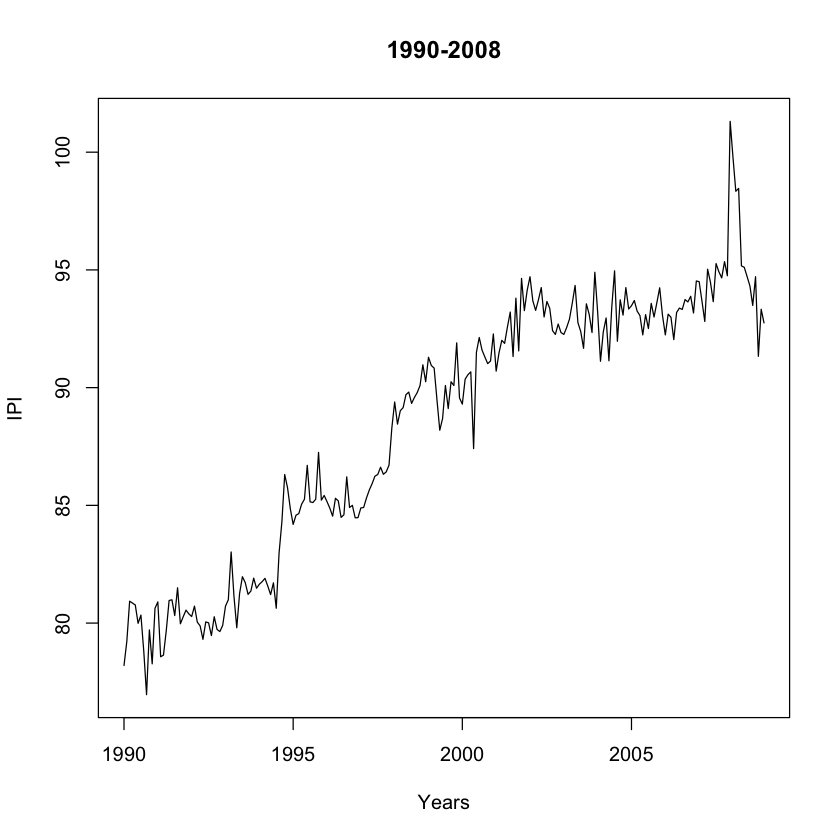

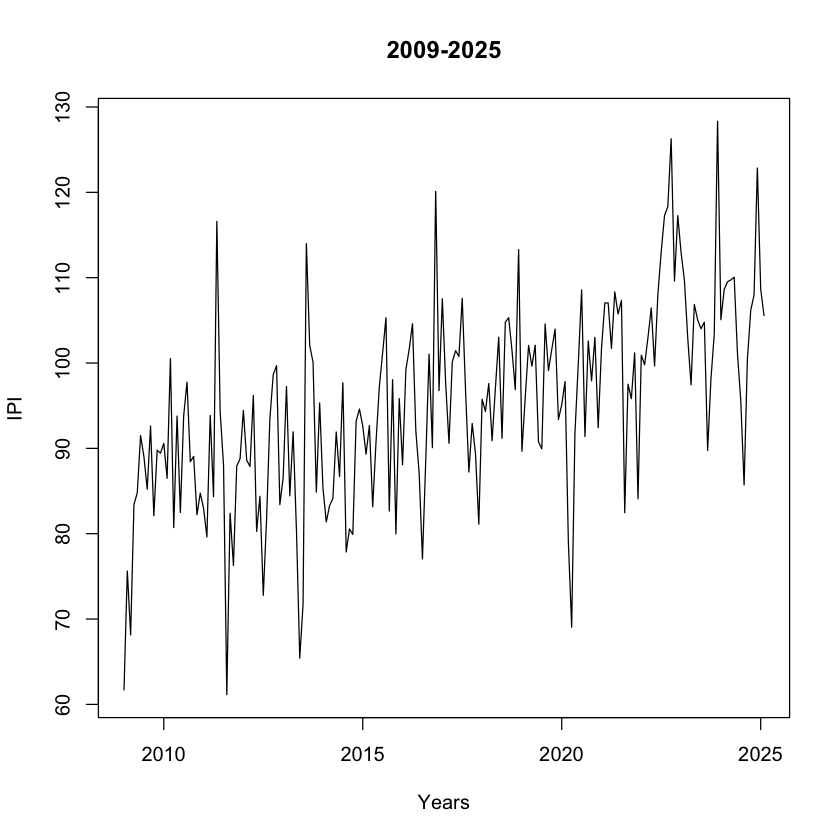

In [19]:
# And plot them
plot.ts(Xt1, xlab="Years", ylab="IPI",main="1990-2008")
plot.ts(Xt2, xlab="Years", ylab="IPI",main="2009-2025")

In [17]:
Xt1
# We can see that the first part of the time series is stationary, while the second part is not.


ERROR: Error: object 'Xt1' not found


In [16]:
# Load the packages
library(fUnitRoots)
library(zoo)
library(tseries)   
library(forecast)
library(readr)

# Load the data
path <- "C:/Users/cianf/OneDrive/Documents/STL"
setwd(path)
getwd() 
list.files() 

path_donnees <- "C:/Users/cianf/OneDrive/Documents/STL/CVSCJO.csv"
data <- read_delim(path_donnees,";", escape_double = FALSE)

# Clean the table
data_all=data[4:425,]
data_all$Codes<-NULL
colnames(data_all)=c("Date_MY","IPI")


# Converting date to the correct format
data_all$Date<-as.Date(paste(data_all$Date_MY,1,sep="-"), format = "%Y-%m-%d")
data_all$Date_MY<-NULL

# Extracting month and year from date 
Year=as.numeric(format(data_all$Date, format = "%Y"))
Month=format(data_all$Date, format = "%m")
data_all=cbind(data_all,Year,Month)
data_all$Year<-as.numeric(data_all$Year)
data_all$IPI<-as.numeric(data_all$IPI)
sort(data_all$IPI)
data_all<-data_all[order(data_all$Date),] 
rownames(data_all) <- seq(length=nrow(data_all)) 


# Create a time series for easier analysis, and plot
Xt.ts<-ts(data_all$IPI,start=c(1990,1), end=c(2025,2), frequency=12)
par(mfrow=c(1,1))
plot.ts(Xt.ts, xlab="Years", ylab="IPI (CVS-CJO)")


# As we find a noticeable change in the data before and after January 2009,
# We split the data into two subsets of the time series
Xt1 <- window(Xt.ts, end=c(2008, 12))
Xt2 <- window(Xt.ts, start=c(2009, 1))

# And plot them
plot.ts(Xt1, xlab="Years", ylab="IPI",main="1990-2008")
plot.ts(Xt2, xlab="Years", ylab="IPI",main="2009-2025")


##Sur Xt1##

# Set up a 2-row, 1-column layout
par(mfrow = c(2, 1))

# 1. Plot original series
plot(Xt1, main = "Original Series", type = "l")

# 2. First difference to remove trend
Xt1_diff1 <- diff(Xt1)

# 3. Plot differenced series
plot(Xt1_diff1, main = "Differenced Series", type = "l")

# 4. Check stationarity 
# With Augmented Dickey-Fuller Test (ADF)
adf <- adfTest(Xt1_diff1, lag=0, type="ct") #
adf
# With Philipps-Perron Test (PP)
pp.test(Xt1_diff1)
# With Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)
kpss_test <- kpss.test(Xt1_diff1)
print("KPSS Test Results:")
print(kpss_test)


## We then print ACF & PACF
par(mfrow = c(2, 1))
acf(Xt1_diff1, main = "ACF of Stationary Series")
pacf(Xt1_diff1, main = "PACF of Stationary Series")

# The complete autocorrelation functions are statistically significant until q=2
# The partial autocorrelation is until p = 2
# If y follows an ARIMA(p,d,q), it follows at most an ARIMA (p=2, d=0, q=2)

y1 <- Xt1_diff1 - mean(Xt1_diff1) #to center the series

# 
arima(y1,c(2,0,2)) #

arima202 <- arima(y1,c(2,0,2)) #

#Ljung-Box test for model validity
Box.test(arima202$residuals, lag=5, type="Ljung-Box", fitdf=4) #
# p-value = 0.443: residuals not autocorrelated until 5 lags
# 
Qtests <- function(series, k, fitdf=0) {
  pvals <- apply(matrix(1:k), 1, FUN=function(l) {
    pval <- if (l<=fitdf) NA else Box.test(series, lag=l, type="Ljung-Box", fitdf=fitdf)$p.value
    return(c("lag"=l,"pval"=pval))
  })
  return(t(pvals))
}
Qtests(arima202$residuals, 24, 5) #tests de LB pour les ordres 1 a 24
round(Qtests(arima202$residuals,24,fitdf=4),3)
#The absence of autocorrelation can never be rejected at the 95% level until 24 lags. The model is thus valid.
#


## The possible sub models are such that p <= 2, d=0, q<=2
signif <- function(estim){ #test function of individual statistical significance of the coefficients
  coef <- estim$coef
  se <- sqrt(diag(estim$var.coef))
  t <- coef/se
  pval <- (1-pnorm(abs(t)))*2
  return(rbind(coef,se,pval))
}

signif(arima202) #

# Diagnostic function
arimafit <- function(estim){
  adjust <- round(signif(estim), 3)
  pvals <- Qtests(estim$residuals, 24, length(estim$coef) - 1)
  pvals <- matrix(apply(matrix(1:24, nrow = 6), 2, function(c) round(pvals[c,], 3)), nrow = 6)
  colnames(pvals) <- rep(c("lag", "pval"), 4)
  
  cat("Tests de nullité des coefficients :\n")
  print(adjust)
  cat("\nTests d'absence d'autocorrélation des résidus :\n")
  print(pvals)
}

# Model fitting
estim <- arima(y, c(1,0,0)); arimafit(estim)
estim <- arima(y, c(2,0,0)); arimafit(estim); ar2 <- estim

estim <- arima(y, c(0,0,1)); arimafit(estim)
estim <- arima(y, c(0,0,2)); arimafit(estim); ma2 <- estim

estim <- arima(y, c(1,0,1)); arimafit(estim)
estim <- arima(y, c(1,0,2)); arimafit(estim)
estim <- arima(y, c(2,0,1)); arimafit(estim); ar2ma1 <- estim

estim <- arima(y, c(2,0,2)); arimafit(estim); ar2ma2 <- estim

# Model comparison
models <- c("ar2", "ma2", "ar2ma1", "ar2ma2"); names(models) <- models
apply(as.matrix(models), 1, function(m) c("AIC" = AIC(get(m)), "BIC" = BIC(get(m))))


## Sur Xt2 ##

# Set up a 2-row, 1-column layout
par(mfrow = c(2, 1))

# 1. Plot original series
plot(Xt2, main = "Original Series", type = "l")

# 2. First difference to remove trend
Xt2_diff1 <- diff(Xt2)

# 3. Plot differenced series
plot(Xt2_diff1, main = "Differenced Series", type = "l")

# 4. Check stationarity 
# With Augmented Dickey-Fuller Test (ADF)
adf <- adfTest(Xt2_diff1, lag = 0, type = "ct")
adf

# With Phillips-Perron Test (PP)
pp.test(Xt2_diff1)

# With Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)
kpss_test <- kpss.test(Xt2_diff1)
print("KPSS Test Results:")
print(kpss_test)

# ACF & PACF plots
par(mfrow = c(2, 1))
acf(Xt2_diff1, main = "ACF of Stationary Series")
pacf(Xt2_diff1, main = "PACF of Stationary Series")

## Here, we can test up to ARIMA (6,0,4)

# We'll start from the already differenced & centered series:
y <- Xt2_diff1 - mean(Xt2_diff1)

# Reusable diagnostic functions (unchanged)
signif <- function(estim){
  coef <- estim$coef
  se <- sqrt(diag(estim$var.coef))
  t <- coef/se
  pval <- (1 - pnorm(abs(t))) * 2
  return(rbind(coef, se, pval))
}

Qtests <- function(series, k, fitdf = 0) {
  pvals <- apply(matrix(1:k), 1, FUN = function(l) {
    pval <- if (l <= fitdf) NA else Box.test(series, lag = l, type = "Ljung-Box", fitdf = fitdf)$p.value
    return(c("lag" = l, "pval" = pval))
  })
  return(t(pvals))
}

arimafit <- function(estim){
  adjust <- round(signif(estim), 3)
  pvals <- Qtests(estim$residuals, 24, length(estim$coef) - 1)
  pvals <- matrix(apply(matrix(1:24, nrow = 6), 2, function(c) round(pvals[c,], 3)), nrow = 6)
  colnames(pvals) <- rep(c("lag", "pval"), 4)
  
  cat("Tests de nullité des coefficients :\n")
  print(adjust)
  cat("\nTests d'absence d'autocorrélation des résidus :\n")
  print(pvals)
}

# Storage for all models
model_list <- list()

# Loop through all combinations of p = 0:6 and q = 0:4
for (p in 0:6) {
  for (q in 0:4) {
    model_name <- paste0("arima_", p, "0", q)
    tryCatch({
      fit <- arima(y, c(p, 0, q))
      model_list[[model_name]] <- fit
      cat("\nModel:", model_name, "\n")
      arimafit(fit)
    }, error = function(e) {
      cat("\nModel", model_name, "failed to converge or not invertible.\n")
    })
  }
}

# Create comparison table
results <- do.call(rbind, lapply(names(model_list), function(name) {
  model <- model_list[[name]]
  c(Model = name, AIC = AIC(model), BIC = BIC(model))
}))

results_df <- as.data.frame(results)
results_df$AIC <- as.numeric(as.character(results_df$AIC))
results_df$BIC <- as.numeric(as.character(results_df$BIC))

# Sort by AIC
results_df[order(results_df$AIC), ]



## Et pour comparer avec Xt
##Sur Xt1##

# Set up a 2-row, 1-column layout
par(mfrow = c(2, 1))

# 1. Plot original series
plot(Xt.ts, main = "Original Series", type = "l")

# 2. First difference to remove trend
Xt_diff1 <- diff(Xt.ts)

# 3. Plot differenced series
plot(Xt_diff1, main = "Differenced Series", type = "l")

# 4. Check stationarity 
# With Augmented Dickey-Fuller Test (ADF)
adf <- adfTest(Xt_diff1, lag=0, type="ct") #
adf
# With Philipps-Perron Test (PP)
pp.test(Xt_diff1)
# With Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)
kpss_test <- kpss.test(Xt_diff1)
print("KPSS Test Results:")
print(kpss_test)


## We then print ACF & PACF
par(mfrow = c(2, 1))
acf(Xt_diff1, main = "ACF of Stationary Series")
pacf(Xt_diff1, main = "PACF of Stationary Series")



ERROR: Error in setwd(path): cannot change working directory
